In [ ]:
!pip install keras-tuner scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.applications import ResNet50
import tabulate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.ndimage import zoom
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Load and preprocess the data
def load_and_preprocess_data():
    train_images = pd.read_csv('csvTrainImages.csv').values
    train_labels = pd.read_csv('csvTrainLabel.csv').values
    test_images = pd.read_csv('csvTestImages.csv').values
    test_labels = pd.read_csv('csvTestLabel.csv').values

    x_train = train_images.reshape((-1, 32, 32, 1)).astype('float32') / 255
    x_test = test_images.reshape((-1, 32, 32, 1)).astype('float32') / 255
    y_train = to_categorical(train_labels - 1, num_classes=28)
    y_test = to_categorical(test_labels - 1, num_classes=28)

    return x_train, y_train, x_test, y_test


In [ ]:
x_train, y_train, x_test, y_test = load_and_preprocess_data()

In [ ]:
def plot_metrics(history, test_acc=None):
    plt.figure(figsize=(12, 4))

    # Loss subplot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    # Accuracy subplot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.show()


# **Task1**

---



---

In [ ]:
def build_cnn_model(learning_rate):
    model = Sequential()
    # 3 Convolutional Layers with Max Pooling
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(MaxPooling2D((2, 2), strides=1))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=2))

    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=2))

    model.add(Dropout(0.4))

    # Flatten the output to feed into the dense layers
    model.add(Flatten())

    # Dense layer with L2 regularization
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    BatchNormalization(),
    model.add(Dropout(0.4))

    model.add(Dense(28, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

Epoch 1/100
413/420 [============================>.] - ETA: 0s - loss: 3.3012 - accuracy: 0.1135
Epoch 1: val_accuracy improved from -inf to 0.35904, saving model to ./best_model.keras
420/420 [==============================] - 4s 6ms/step - loss: 3.2954 - accuracy: 0.1147 - val_loss: 2.6223 - val_accuracy: 0.3590
Epoch 2/100
418/420 [============================>.] - ETA: 0s - loss: 2.5918 - accuracy: 0.2798
Epoch 2: val_accuracy improved from 0.35904 to 0.53379, saving model to ./best_model.keras
420/420 [==============================] - 2s 5ms/step - loss: 2.5898 - accuracy: 0.2800 - val_loss: 1.9161 - val_accuracy: 0.5338
Epoch 3/100
419/420 [============================>.] - ETA: 0s - loss: 2.1016 - accuracy: 0.4078
Epoch 3: val_accuracy improved from 0.53379 to 0.64156, saving model to ./best_model.keras
420/420 [==============================] - 3s 7ms/step - loss: 2.1018 - accuracy: 0.4078 - val_loss: 1.5018 - val_accuracy: 0.6416
Epoch 4/100
419/420 [=========================

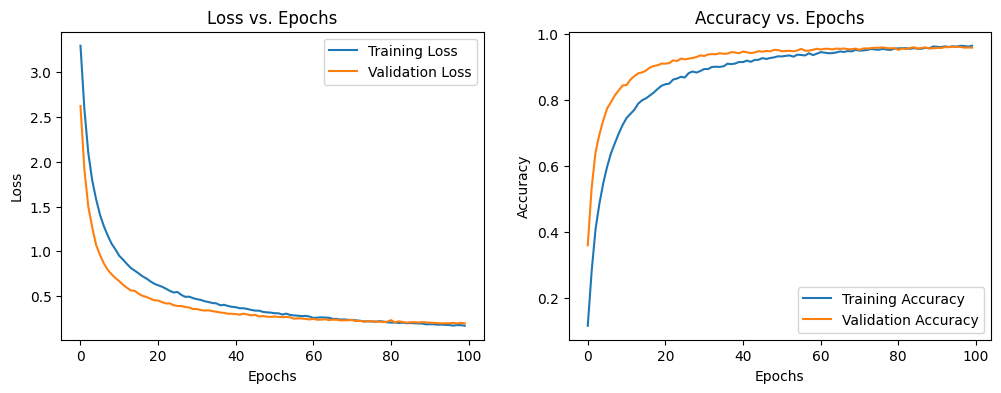

------------------------------------------------------------
Best Training Accuracy: 0.9653
Best Training Loss: 0.1701
Best Test Accuracy: 0.9628
Best Test Loss: 0.1957
------------------------------------------------------------
Result on best model from training:
------------------------------------------------------------
420/420 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.9955
Training Accuracy: 0.9955
Training Loss: 0.0903
------------------------------------------------------------
------------------------------------------------------------
105/105 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9628
Test Accuracy: 0.9628
Test Loss: 0.1967
------------------------------------------------------------


In [ ]:
learning_rate = 0.0001

# Build the model
model = build_cnn_model(learning_rate)
plot_model(model, to_file='/content/drive/My Drive/best_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='LR')
# Saving the model
model_checkpoint_callback = ModelCheckpoint(
    filepath='./best_model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=100,
    validation_data=(x_test, y_test),  # Using the test set as validation data
    callbacks=[model_checkpoint_callback],
    verbose=1)

# Extract best metrics from the test data
best_test_accuracy = max(history.history['val_accuracy'])
best_test_loss = min(history.history['val_loss'])


# Plotting the training metrics and test accuracy
print("\nModel Summary:")
model_summary = []
model.summary(print_fn=lambda x: model_summary.append(x))
print("-" * 60)
for row in model_summary:
    print(row)
print("-" * 60)

plot_metrics(history)

print("-" * 60)
print(f"Best Training Accuracy: {max(history.history['accuracy']):.4f}")
print(f"Best Training Loss: {min(history.history['loss']):.4f}")
print(f"Best Test Accuracy: {best_test_accuracy:.4f}")
print(f"Best Test Loss: {best_test_loss:.4f}")
print("-" * 60)

# Evaluating based on the best test
print("Result on best model from training:")
loaded_model = load_model('./best_model.keras')

print("-" * 60)

#Evaluating the model
train_loss, train_accuracy = loaded_model.evaluate(x_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print("-" * 60)

print("-" * 60)
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print("-" * 60)


# **Task 2**

---



---



Epoch 1/300
419/419 [==============================] - ETA: 0s - loss: 3.4251 - accuracy: 0.0809
Epoch 1: val_accuracy improved from -inf to 0.24829, saving model to ./best_model.keras
419/419 [==============================] - 15s 17ms/step - loss: 3.4251 - accuracy: 0.0809 - val_loss: 2.7945 - val_accuracy: 0.2483
Epoch 2/300
418/419 [============================>.] - ETA: 0s - loss: 2.8444 - accuracy: 0.2143
Epoch 2: val_accuracy improved from 0.24829 to 0.52605, saving model to ./best_model.keras
419/419 [==============================] - 9s 22ms/step - loss: 2.8451 - accuracy: 0.2139 - val_loss: 1.9268 - val_accuracy: 0.5260
Epoch 3/300
418/419 [============================>.] - ETA: 0s - loss: 2.3834 - accuracy: 0.3223
Epoch 3: val_accuracy improved from 0.52605 to 0.64007, saving model to ./best_model.keras
419/419 [==============================] - 8s 19ms/step - loss: 2.3841 - accuracy: 0.3221 - val_loss: 1.4692 - val_accuracy: 0.6401
Epoch 4/300
419/419 [=====================

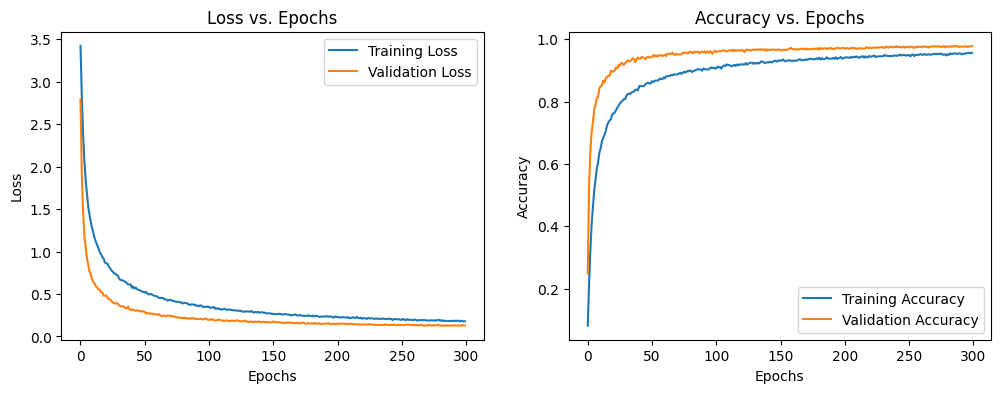

------------------------------------------------------------
Best Training Accuracy: 0.9564
Best Training Loss: 0.1755
Best Test Accuracy: 0.9792
Best Test Loss: 0.1262
------------------------------------------------------------
Result on best model from training:
------------------------------------------------------------
420/420 [==============================] - 2s 4ms/step - loss: 0.0724 - accuracy: 0.9908
Training Accuracy: 0.9908
Training Loss: 0.0724
------------------------------------------------------------
------------------------------------------------------------
105/105 [==============================] - 0s 4ms/step - loss: 0.1268 - accuracy: 0.9792
Test Accuracy: 0.9792
Test Loss: 0.1268
------------------------------------------------------------


In [ ]:
learning_rate = 0.0001

model = build_cnn_model(learning_rate)

model_checkpoint_callback = ModelCheckpoint(
    filepath='./best_model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

# Defining data augmentation configuration
data_augmentation = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    zoom_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

# Train the model with data augmentation
batch_size = 32
epochs = 300

# Fitting the model with the new data
history = model.fit(
    data_augmentation.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[model_checkpoint_callback],
    verbose=1
)


test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("\nModel Summary:")
model_summary = []
model.summary(print_fn=lambda x: model_summary.append(x))
print("-" * 60)
for row in model_summary:
    print(row)
print("-" * 60)

best_training_accuracy = max(history.history['accuracy'])
best_training_loss = min(history.history['loss'])
best_test_accuracy = max(history.history['val_accuracy'])
best_test_loss = min(history.history['val_loss'])

plot_metrics(history)

print("-" * 60)
print(f"Best Training Accuracy: {best_training_accuracy:.4f}")
print(f"Best Training Loss: {best_training_loss:.4f}")
print(f"Best Test Accuracy: {best_test_accuracy:.4f}")
print(f"Best Test Loss: {best_test_loss:.4f}")
print("-" * 60)



print("Result on best model from training:")
loaded_model = load_model('./best_model.keras')

print("-" * 60)
train_loss, train_accuracy = loaded_model.evaluate(x_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print("-" * 60)

print("-" * 60)
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print("-" * 60)


# **Task3**

---



---



Epoch 1/50
418/419 [============================>.] - ETA: 0s - loss: 2.9977 - accuracy: 0.2152
Epoch 1: val_accuracy improved from -inf to 0.33671, saving model to ./best_model.keras
419/419 [==============================] - 28s 34ms/step - loss: 2.9960 - accuracy: 0.2156 - val_loss: 2.2514 - val_accuracy: 0.3367
Epoch 2/50
418/419 [============================>.] - ETA: 0s - loss: 1.8480 - accuracy: 0.4487
Epoch 2: val_accuracy improved from 0.33671 to 0.60911, saving model to ./best_model.keras
419/419 [==============================] - 14s 33ms/step - loss: 1.8463 - accuracy: 0.4491 - val_loss: 1.2279 - val_accuracy: 0.6091
Epoch 3/50
417/419 [============================>.] - ETA: 0s - loss: 1.3721 - accuracy: 0.5822
Epoch 3: val_accuracy improved from 0.60911 to 0.69247, saving model to ./best_model.keras
419/419 [==============================] - 13s 32ms/step - loss: 1.3705 - accuracy: 0.5828 - val_loss: 0.9444 - val_accuracy: 0.6925
Epoch 4/50
417/419 [=======================

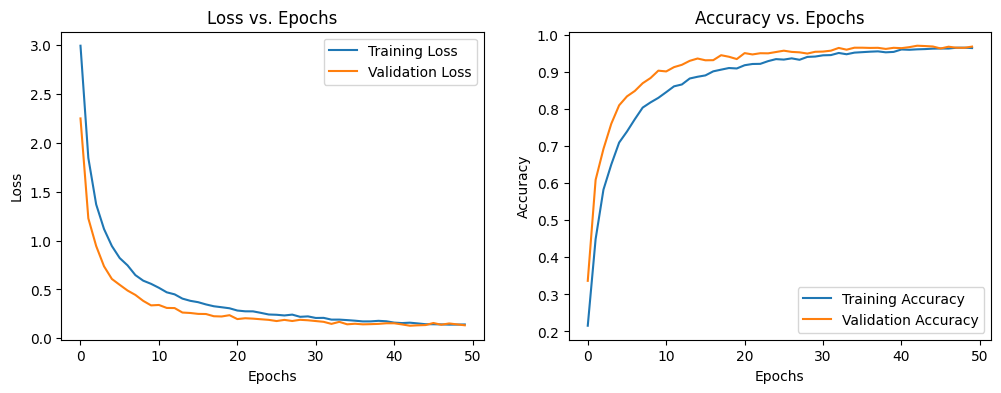

------------------------------------------------------------
Best Training Accuracy: 0.9658
Best Training Loss: 0.1394
Best Test Accuracy: 0.9711
Best Test Loss: 0.1283
------------------------------------------------------------
Result on best model from training:
------------------------------------------------------------
420/420 [==============================] - 3s 6ms/step - loss: 0.0769 - accuracy: 0.9878
Training Accuracy: 0.9878
Training Loss: 0.0769
------------------------------------------------------------
------------------------------------------------------------
105/105 [==============================] - 1s 5ms/step - loss: 0.1283 - accuracy: 0.9711
Test Accuracy: 0.9711
Test Loss: 0.1283
------------------------------------------------------------


In [ ]:
model = Sequential([
    # Input layer: Convert grayscale 32x32x1 to 32x32x3
    Conv2D(3, (3, 3), padding='same', input_shape=(32, 32, 1), activation='relu'),

    # MobileNetV2 base model
    MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3)),
    Flatten(),


    # Dense layer with L2 regularization
    Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(28, activation='softmax')
])

plot_model(model, to_file='/content/drive/My Drive/best_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='LR')

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_checkpoint_callback = ModelCheckpoint(
    filepath='./best_model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

data_augmentation = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    zoom_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

history = model.fit(
    data_augmentation.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=len(x_train) // 32,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[model_checkpoint_callback],
    verbose=1
)


print("\nModel Summary:")
model_summary = []
model.summary(print_fn=lambda x: model_summary.append(x))
print("-" * 60)
for row in model_summary:
    print(row)
print("-" * 60)

plot_metrics(history)
best_training_accuracy = max(history.history['accuracy'])
best_training_loss = min(history.history['loss'])
best_test_accuracy = max(history.history['val_accuracy'])
best_test_loss = min(history.history['val_loss'])
print("-" * 60)
print(f"Best Training Accuracy: {best_training_accuracy:.4f}")
print(f"Best Training Loss: {best_training_loss:.4f}")
print(f"Best Test Accuracy: {best_test_accuracy:.4f}")
print(f"Best Test Loss: {best_test_loss:.4f}")
print("-" * 60)



print("Result on best model from training:")
loaded_model = load_model('./best_model.keras')

print("-" * 60)
train_loss, train_accuracy = loaded_model.evaluate(x_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print("-" * 60)

print("-" * 60)
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print("-" * 60)


# **Task4**

---



---



In [ ]:
def load_and_preprocess_data2():
    train_images = pd.read_csv('csvTrainImages.csv').values
    train_labels = pd.read_csv('csvTrainLabel.csv').values
    test_images = pd.read_csv('csvTestImages.csv').values
    test_labels = pd.read_csv('csvTestLabel.csv').values
    x_train = train_images.reshape((-1, 32, 32, 1)).astype('float32')
    x_test = test_images.reshape((-1, 32, 32, 1)).astype('float32')

    # Resizing to 64x64
    x_train = np.array([zoom(image, (2, 2, 1)) for image in x_train])
    x_test = np.array([zoom(image, (2, 2, 1)) for image in x_test])

    x_train /= 255
    x_test /= 255

    x_train -= 0.5
    x_test -=0.5

    y_train = to_categorical(train_labels - 1, num_classes=28)
    y_test = to_categorical(test_labels - 1, num_classes=28)

    # Check if the number of images matches the number of labels
    if x_train.shape[0] != y_train.shape[0] or x_test.shape[0] != y_test.shape[0]:
        raise ValueError("The number of images does not match the number of labels.")

    return x_train, y_train, x_test, y_test

In [ ]:
# Dataset resizing
x_train, y_train, x_test, y_test = load_and_preprocess_data2()

In [ ]:
def activate_model(model):
    # Uploading The Pre-Trained Model
    loaded_model = tf.keras.models.load_model(model)
    new_model = Sequential()

    for layer in loaded_model.layers[:-1]:
      new_model.add(layer)

    new_model.add(Flatten())

    # Fine Parameter Tuning Implementation
    new_model.add(Dense(1024, activation='relu'))
    new_model.add(Dense(128, activation='relu'))
    new_model.add(Dropout(0.2))
    new_model.add(Dense(64, activation='relu'))
    new_model.add(Dense(28, activation='softmax'))
    new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    new_model.summary()
    return new_model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_36 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_37 (Dropout)        (None, 14, 14, 32)       

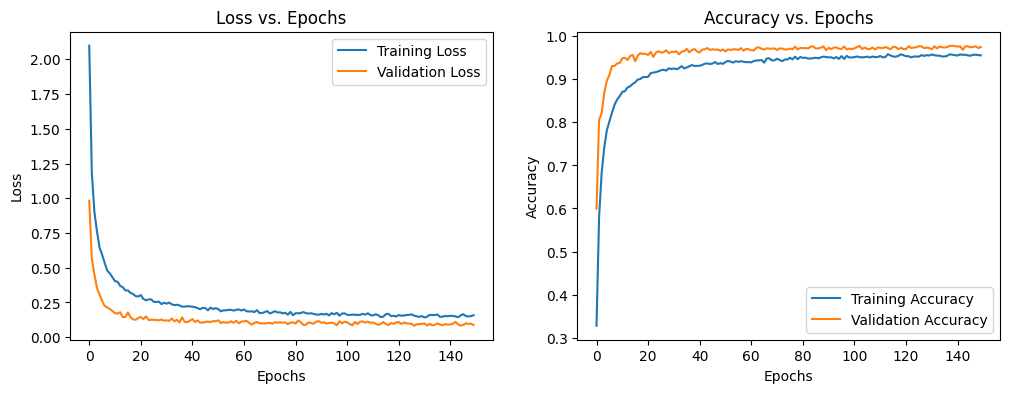

------------------------------------------------------------
Best Training Accuracy: 0.9584
Best Training Loss: 0.1415
Best Test Accuracy: 0.9780
Best Test Loss: 0.0821
------------------------------------------------------------
Result on best model from training:
------------------------------------------------------------
420/420 [==============================] - 2s 3ms/step - loss: 0.0373 - accuracy: 0.9890
Training Accuracy: 0.9890
Training Loss: 0.0373
------------------------------------------------------------
------------------------------------------------------------
105/105 [==============================] - 0s 3ms/step - loss: 0.0935 - accuracy: 0.9780
Test Accuracy: 0.9780
Test Loss: 0.0935
------------------------------------------------------------


In [ ]:
learning_rate = 0.0001

model_file = 'model.h5'
model = activate_model(model_file)
plot_model(model, to_file='/content/drive/My Drive/best_model_plot2.png', show_shapes=True, show_layer_names=True, rankdir='LR')

model_checkpoint_callback = ModelCheckpoint(
    filepath='./best_model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

data_augmentation = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    zoom_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

batch_size = 32
epochs = 150

history = model.fit(
    data_augmentation.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[model_checkpoint_callback],
    verbose=1
)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("\nModel Summary:")
model_summary = []
model.summary(print_fn=lambda x: model_summary.append(x))
print("-" * 60)
for row in model_summary:
    print(row)
print("-" * 60)

best_training_accuracy = max(history.history['accuracy'])
best_training_loss = min(history.history['loss'])
best_test_accuracy = max(history.history['val_accuracy'])
best_test_loss = min(history.history['val_loss'])

plot_metrics(history)

print("-" * 60)
print(f"Best Training Accuracy: {best_training_accuracy:.4f}")
print(f"Best Training Loss: {best_training_loss:.4f}")
print(f"Best Test Accuracy: {best_test_accuracy:.4f}")
print(f"Best Test Loss: {best_test_loss:.4f}")
print("-" * 60)



print("Result on best model from training:")
loaded_model = load_model('./best_model.keras')

print("-" * 60)
train_loss, train_accuracy = loaded_model.evaluate(x_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print("-" * 60)

print("-" * 60)
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print("-" * 60)